In [83]:
# import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [84]:
# load the iris dataset
iris = load_iris()
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [85]:
iris.feature_names
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [86]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [88]:
# create three dataframes each for the different species of flowers
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

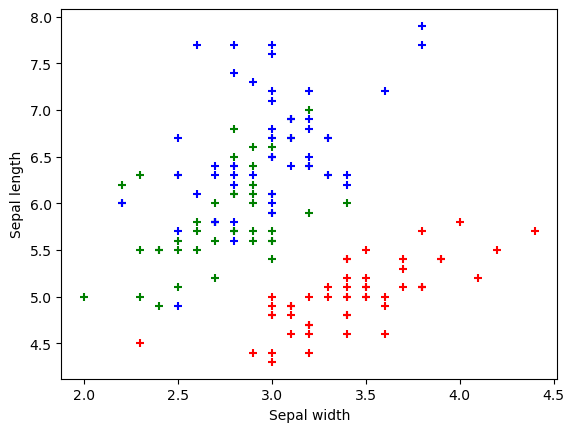

In [89]:
# scatter plot
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')
plt.scatter(x=df0['sepal width (cm)'],y=df0['sepal length (cm)'],color='red',marker='+')
plt.scatter(x=df1['sepal width (cm)'],y=df1['sepal length (cm)'],color='green',marker='+')
plt.scatter(x=df2['sepal width (cm)'],y=df2['sepal length (cm)'],color='blue',marker='+')

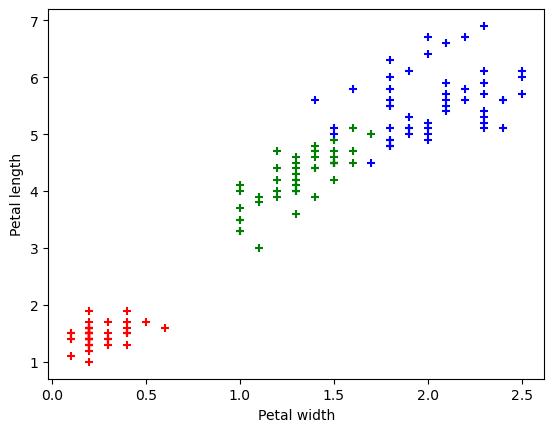

In [90]:
# scatter plot
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.scatter(x=df0['petal width (cm)'],y=df0['petal length (cm)'],color='red',marker='+')
plt.scatter(x=df1['petal width (cm)'],y=df1['petal length (cm)'],color='green',marker='+')
plt.scatter(x=df2['petal width (cm)'],y=df2['petal length (cm)'],color='blue',marker='+')

In [91]:
# define features and target variables
features = df.drop(['target','flower_names'],axis=1)
target = df.target

In [92]:
# train test split data
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [93]:
# create and fit the model
model = SVC(kernel='linear')
model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [94]:
# model's accuracy
print(f"Accuracy: {model.score(x_test,y_test)*100:.2f}%")

Accuracy: 100.00%


In [95]:
# confusion matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(95.72222222222221, 0.5, 'True')

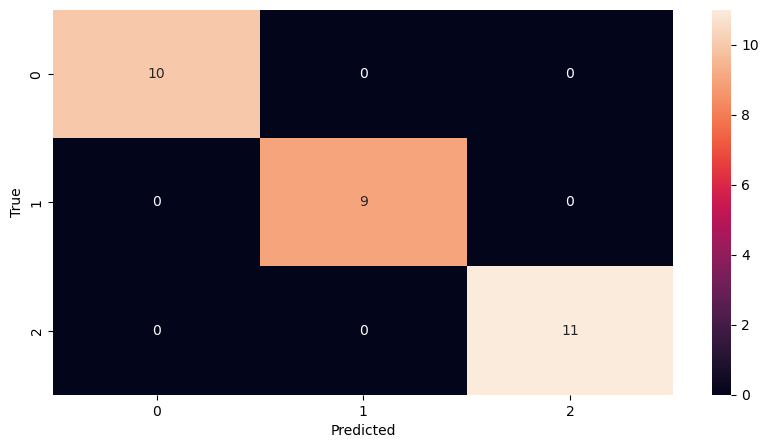

In [96]:
# confusion matrix heatmap
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")